# ggplot in R

- [cheat sheet](https://www.rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf)
- [examples/gallery](http://www.r-graph-gallery.com/portfolio/ggplot2-package/)


# NOTE code cells contain R-code not iPython

## 1 - get the data 

Read the data from dia.csv and have a look

In [1]:
dia <- read.csv('./dat/dia.csv')

In [2]:
str(dia)

'data.frame':	500 obs. of  4 variables:
 $ carat: num  0.71 1.55 0.51 1.01 0.47 0.3 0.8 0.31 0.8 0.54 ...
 $ cut  : Factor w/ 5 levels "Fair","Good",..: 3 4 2 3 3 4 2 5 3 3 ...
 $ color: Factor w/ 7 levels "D","E","F","G",..: 4 4 2 1 3 3 3 4 5 5 ...
 $ price: int  2950 10499 1170 10797 1226 737 3477 625 3972 1774 ...


In [3]:
head(dia)

carat,cut,color,price
0.71,Ideal,G,2950
1.55,Premium,G,10499
0.51,Good,E,1170
1.01,Ideal,D,10797
0.47,Ideal,F,1226
0.30,Premium,F,737


# 2 -  import the ggplot2 library

In [4]:
library(ggplot2)

# 3 - some examples

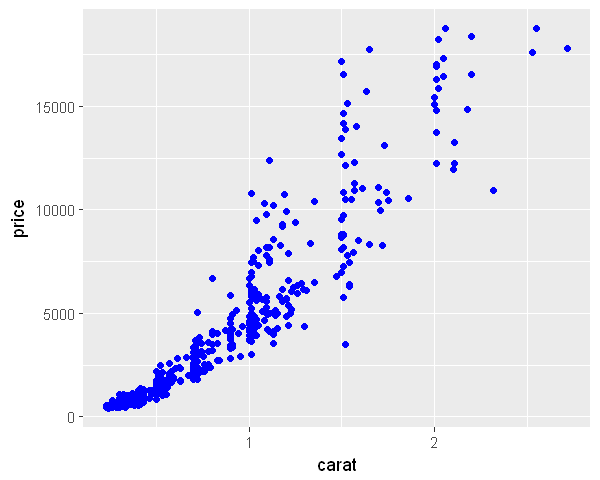

In [16]:
options(repr.plot.width  = 5, repr.plot.height = 4)
fig = ggplot(aes(x=carat,y=price),data=dia) 
fig = fig + geom_point(color='blue')
print(fig)

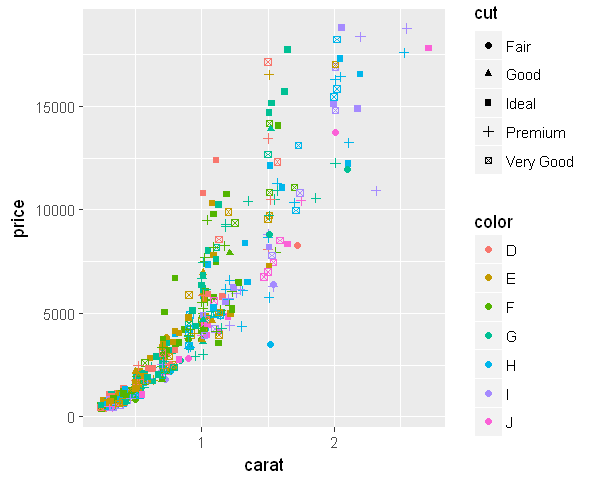

In [17]:
fig = ggplot(aes(x=carat,y=price,color=color,shape=cut),data=dia) 
fig = fig + geom_point()
print(fig)

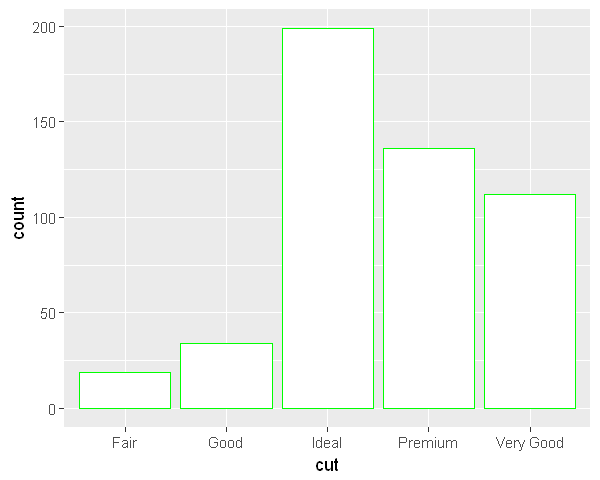

In [18]:
fig = ggplot(aes(x=cut),data=dia) 
fig = fig + geom_bar(color='green', fill='white')
fig

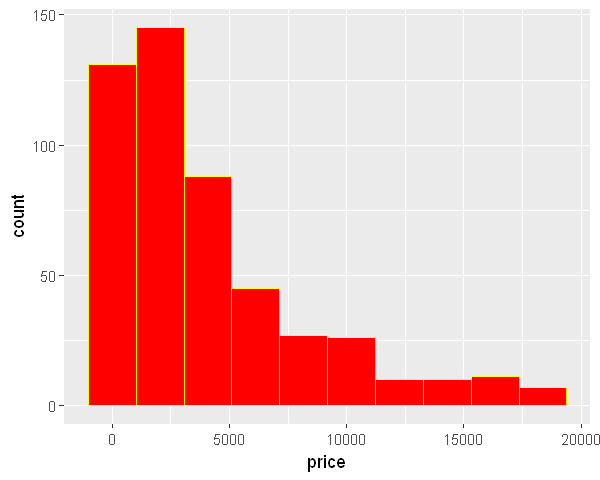

In [19]:
fig = ggplot(aes(x=price),data=dia) 
fig = fig + geom_histogram(color='yellow',fill='red',bins = 10,)
fig

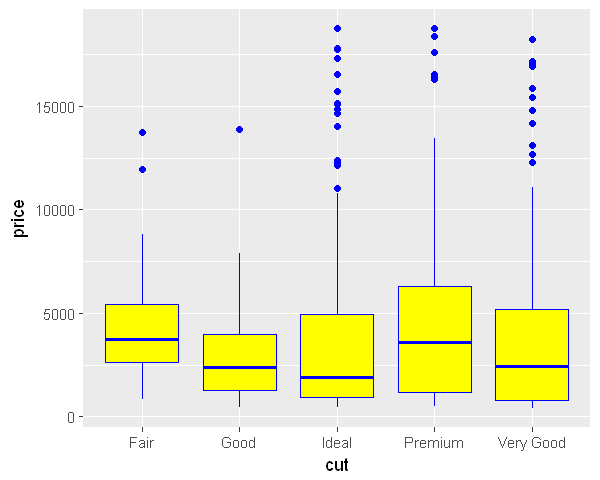

In [20]:
fig = ggplot(aes(x=cut,y=price),data=dia) 
fig = fig + geom_boxplot(color='blue', fill='yellow')
fig

# 4 - the weather events example

In [21]:
dat <- read.csv('./dat/analytic_data.csv')

In [22]:
library(ggplot2)
library(sqldf)

In [23]:
injur <- sqldf(" 
   SELECT event, decade, SUM(injur) AS injuries
   FROM dat
   GROUP BY event, decade
   ORDER BY event, decade
")

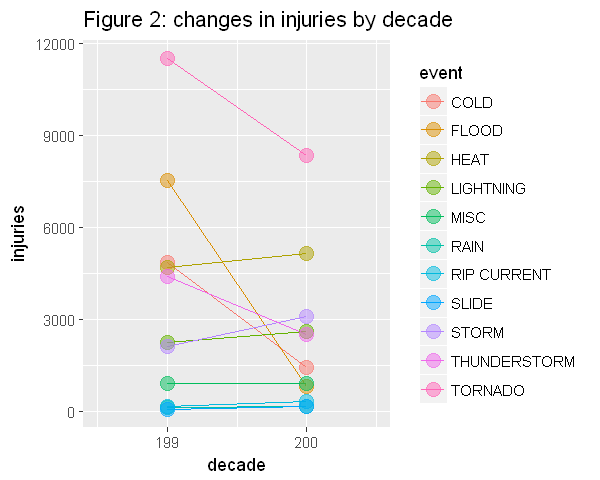

In [26]:
ggplot(injur, aes(x=decade, y=injuries, colour=event, group=event)) +
              geom_line() +
              geom_point(size=4,alpha=0.5) +
              ggtitle("Figure 2: changes in injuries by decade") +
              scale_x_continuous(breaks=c(199,200), limits=c(198.5, 200.5))